<H1>IMPORT DAS BIBLIOTECAS</H1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.colors as mcolors

<h1>Leitura dos Dados</h1>

In [3]:
#Fonte de dados, export de dados do Factory Talk View
df = pd.read_excel('db.xlsx', sheet_name='Planilha1')


<h1>Tratameno do dataframe</h1>
<h2>> Remove colunas não utilizadas</h2>
<h2>> Soma as falhas por linha</h2>
<h2>> Cria a variável DateTime</h2>
<h2>> Separa o somatório de falhas em outro dataframe</h2>
<h2>> Agrupa por hora os somatórios</h2>
<h2>> Converte o horário para escala de segundos</h2>






In [4]:
df.drop(columns=['No.','Millitm'],inplace = True)

Criar listas de tags a serem utilizadas por servidor

In [5]:
df['falhas'] = df.iloc[:, 2:].sum(axis=1)

In [6]:
df['DateTime'] = df['Date'].astype('string') + ' ' + df['Time'].astype('string')

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [8]:
df.set_index('DateTime', inplace=True)

In [9]:
df_filtrado = df['falhas']
#aquiiiii

In [10]:
df_agrupado = df_filtrado.resample('H').sum()

In [11]:
df_final = pd.DataFrame(df_agrupado)


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430 entries, 2023-08-11 20:00:00 to 2023-10-10 09:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   falhas  1430 non-null   float64
dtypes: float64(1)
memory usage: 22.3 KB


In [13]:
df_final['DataHora'] = df_final.index
df_final = df_final.iloc[:-2]

In [14]:
df_final['DataHora'] = pd.to_datetime(df_final['DataHora'])
df_final['Data'] = df_final['DataHora'].dt.date
df_final['Horario'] = df_final['DataHora'].dt.time.apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)


# **Grafico da rede Geral**

Grafico sem filtro e com filtro de 20 falhas ou mais

<ipython-input-15-3b54080c894a>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(df_final['Data'], df_final['Horario']/3600, c=cores, cmap=cm.get_cmap('inferno'), alpha=0.8)


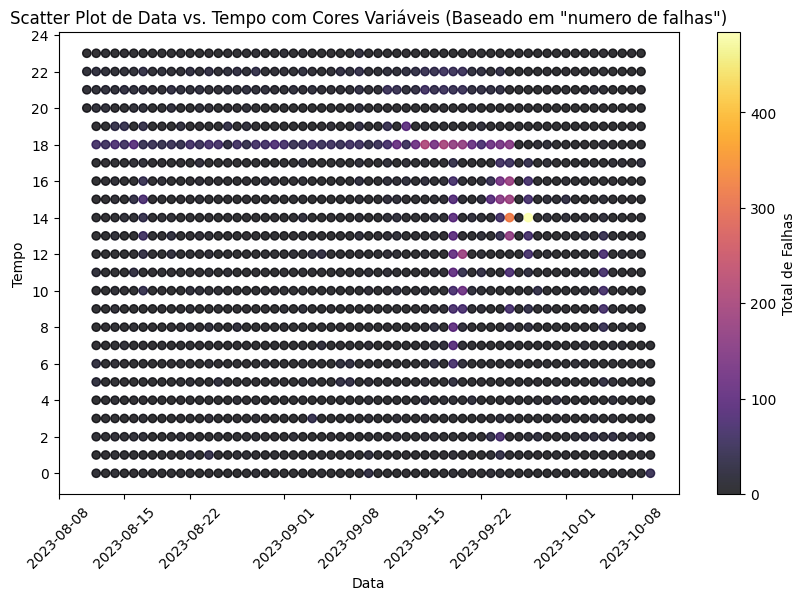

In [15]:
cores = df_final['falhas']

# Crie o scatter plot com as cores
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_final['Data'], df_final['Horario']/3600, c=cores, cmap=cm.get_cmap('inferno'), alpha=0.8)
plt.xlabel('Data')
plt.ylabel('Tempo')
plt.title('Scatter Plot de Data vs. Tempo com Cores Variáveis (Baseado em "numero de falhas")')
plt.grid(False)  # Adicione uma grade (opcional)

# Rotacione os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)
plt.yticks([0,2, 4, 6, 8, 10, 12,14,16,18,20,22,24])
# Adicione uma barra de cores para mapear os valores
cbar = plt.colorbar(scatter)
cbar.set_label('Total de Falhas')

# Mostre o scatter plot
plt.show()

<h1>Heatmap completo de concentração de falhas por hora</h1>

<ipython-input-16-57a1a2353386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['Horario'] = df_heatmap['Horario'].astype(float) / 3600


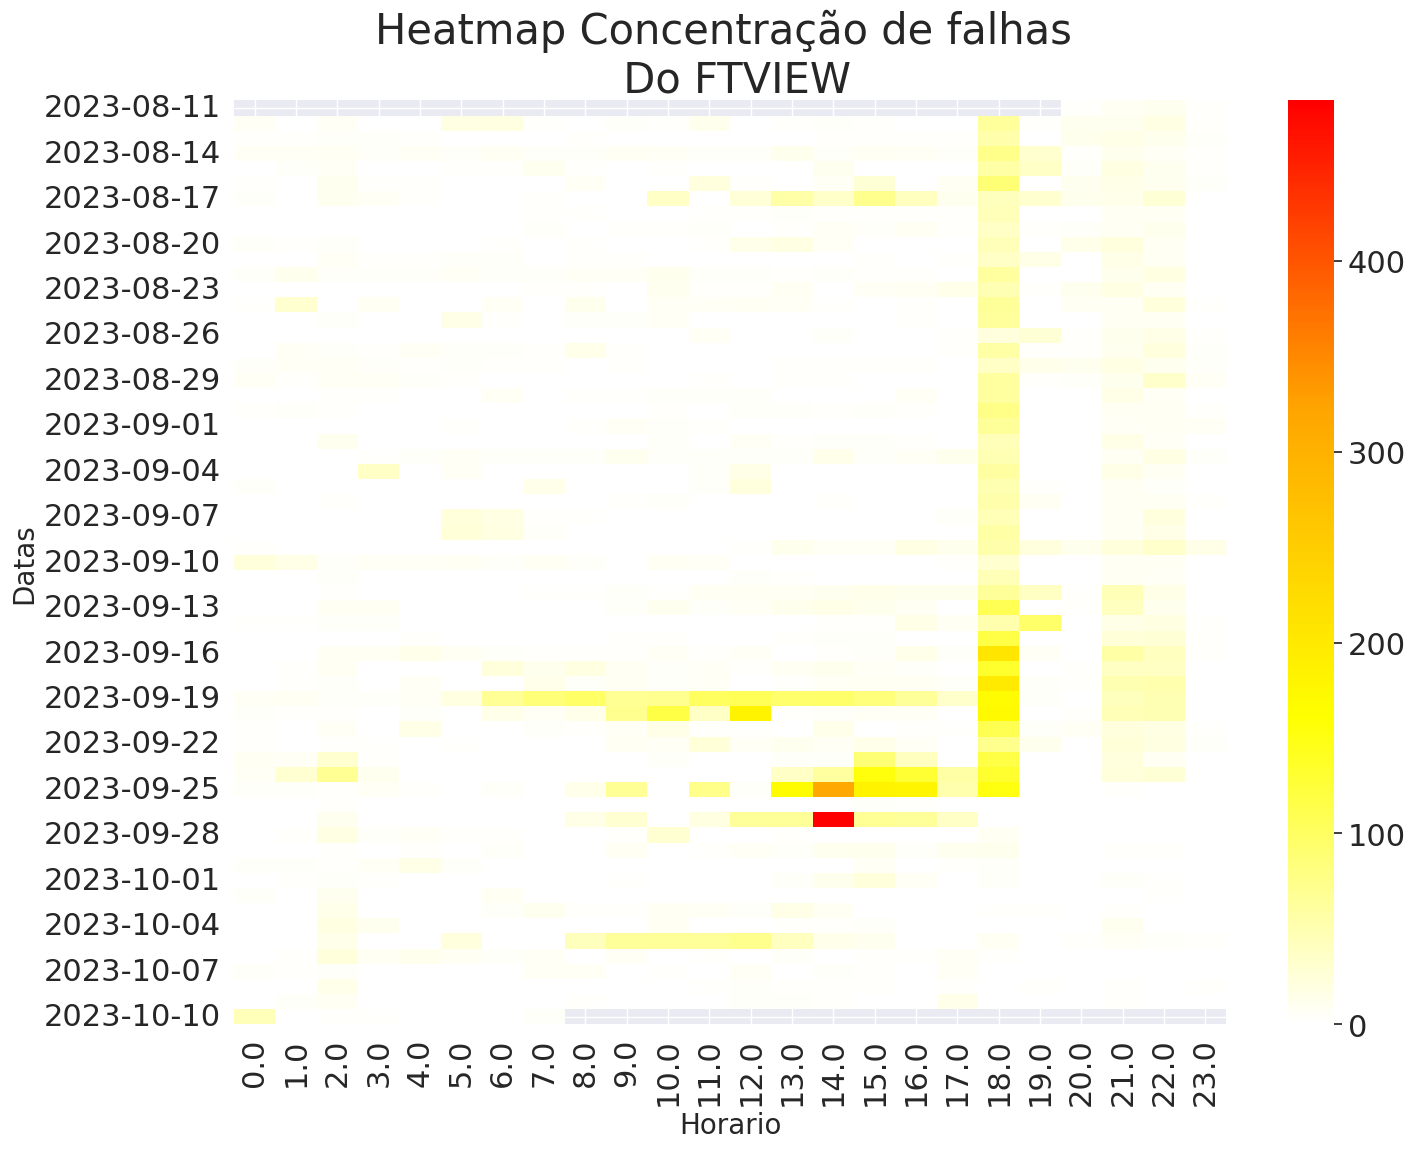

In [16]:

# Cria um DataFrame
df_heatmap = df_final[['Data','Horario','falhas'] ]
df_heatmap['Horario'] = df_heatmap['Horario'].astype(float) / 3600
# Pivotar o DataFrame para que as datas sejam o índice, as horas sejam as colunas e os valores preencham o heatmap
pivot_df = df_heatmap.pivot(index='Data', columns='Horario', values='falhas')
#pivot_df = pivot_df.dropna()

#df_heatmap['Data'] = df_heatmap['Data'].astype('string')
#df_heatmap['Horario'] = df_heatmap[['Horario']/3600]
# Crie um heatmap usando a biblioteca seaborn
plt.figure(figsize=(16, 12))
sns.set(font_scale=2)  # Ajuste o tamanho da fonte

# Defina as cores inicial (branco) e final (vermelho)
cor_inicio = "white"
cor_inicio2 = "yellow"
cor_meio = "orange"
cor_fim = "red"

# Crie um colormap personalizado com transição de cores
cmaping = mcolors.LinearSegmentedColormap.from_list(
    "green_to_red", [cor_inicio, cor_inicio2,cor_meio ,cor_fim], N=256)
# Crie uma normalização personalizada que normalize os valores entre  0 e 80
custom_norm = mcolors.Normalize(vmin=0, vmax=80)

sns.heatmap(pivot_df, annot=False, fmt="d", cmap= cmaping)
#sns.heatmap(pivot_df, annot=False, fmt="d", cmap= 'inferno',norm=custom_norm)

# Adicione rótulos aos eixos
plt.xlabel('Horario',fontsize = 20)
plt.ylabel('Datas' ,fontsize =  20)

# Exiba o gráfico
plt.title('Heatmap Concentração de falhas \n Do FTVIEW',fontsize =  30)
plt.show()

Filtro minimo de eventos para reduzir o numero de informações do sccaterplot

In [17]:
df_filt1 =  df_final[df_final['falhas'] >= 20]

Gera Sccaterplot com dados de concentração de falhas e filtro apenas nos pontos de maiores incidencia

<ipython-input-18-ff8e9f1d9b1c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(df_filt1['Data'], df_filt1['Horario']/3600, c=cores, cmap=cm.get_cmap('inferno'), alpha=0.8)


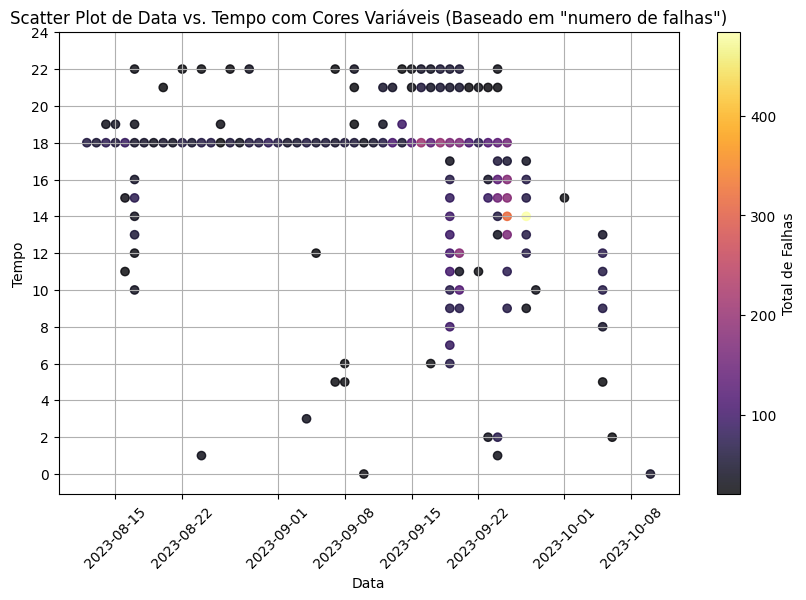

In [18]:
plt.rcdefaults()
cores = df_filt1['falhas']

# Crie o scatter plot com as cores
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_filt1['Data'], df_filt1['Horario']/3600, c=cores, cmap=cm.get_cmap('inferno'), alpha=0.8)
plt.xlabel('Data')
plt.ylabel('Tempo')
plt.title('Scatter Plot de Data vs. Tempo com Cores Variáveis (Baseado em "numero de falhas")')
plt.grid(False)  # Adicione uma grade (opcional)

# Rotacione os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)
plt.yticks([0,2, 4, 6, 8, 10, 12,14,16,18,20,22,24])
# Adicione uma barra de cores para mapear os valores
cbar = plt.colorbar(scatter)
cbar.set_label('Total de Falhas')
plt.grid()
# Mostre o scatter plot
plt.show()

**Exporta os dados para json**

In [19]:
# Exporte o DataFrame para um arquivo JSON
pivot_df.to_json('heatmap.json', orient='table')